In [ ]:
from google.colab import drive
drive.mount('/gdrive')

%cd /gdrive/MyDrive/CIS509

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive/MyDrive/CIS509


In [ ]:
!pip install gensim
!pip install pyLDAvis

     |████████████████████████████████| 1.7 MB 7.6 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=96439f124eb09622523828ed0a2856b25615b51e3eab133b24abb573ace3c533
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
Successfully built pyLDAvis


In [ ]:
# install gensim and pyLDAvis before you run this code
from gensim import corpora
from gensim import models
import pyLDAvis
import pyLDAvis.gensim_models
import spacy
import json
import pandas as pd
from gensim.models.coherencemodel import CoherenceModel
import numpy as np

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable


In [ ]:
#!python -m spacy download en_core_web_lg
spacy.cli.download("en_core_web_lg")

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_lg')


In [ ]:
input_df = pd.read_csv("ketorecipes_csv_output.csv")

In [ ]:
nlp = spacy.load("en_core_web_lg")

/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:126: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):


**Term Statistics**

In [ ]:
# variables to store term statistics
num_of_comments = 0
unique_word = set() # using the set-type variable since it does not allow duplicates > able to count the number of unique words
num_of_token_per_comment = [] # using the list-type varailbe since we want to measure corpus-level statistics (e.g., avg, max, min, median, etc.)
num_of_token_per_comment_without_stop_words = []
total_number_of_tokens = 0 # in a corpus
unique_author = set() # using the set-type variable since it does not allow duplicates > able to count the number of unique authors
time_stamp_list = [] # able to measure the number of comments by day, week, etc.
reply_count = 0
unique_submission = set() # using the set-type variable since it does not allow duplicates > able to count the number of unique submissions

In [ ]:
# data processing
for index, row in input_df.iterrows():
		text = row["MsgBody"]
		doc = nlp(str(text))
		num_of_comments += 1
		# statistics regarding words
		num_of_tokens = len(doc)
		total_number_of_tokens += num_of_tokens
		token_count_without_stop_words = 0
		for token in doc:
			if token.is_stop is True: # check whether the provided token is a stop word and decide whether to disregard it
				pass
			else:
				unique_word.add(str(token).lower())
				token_count_without_stop_words += 1
		num_of_token_per_comment.append(num_of_tokens)
		num_of_token_per_comment_without_stop_words.append(token_count_without_stop_words)
		# statistics regarding authors
		author_name = row["Author"]
		unique_author.add(str(author_name).lower())
		# statistics regarding time_stamp
		time_stamp = row["Timestamp"]
		time_stamp_list.append(time_stamp)
		# statistics regarding submissions
		thread_id = row["ThreadID"]
		unique_submission.add(thread_id)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups di

In [ ]:
# statistics
print("number of comments:", num_of_comments)
print("number of unique words:", len(unique_word))
print("total number of words in the corpus:", total_number_of_tokens)
print("average number of words in comments:", np.mean(np.asarray(num_of_token_per_comment)))
print("average number of words in comments without stop words:", np.mean(np.asarray(num_of_token_per_comment_without_stop_words)))
print("maximum number of words in comments:", np.max(np.asarray(num_of_token_per_comment)))
print("maximum number of words in comments without stop words:", np.max(np.asarray(num_of_token_per_comment_without_stop_words)))
print("minimum number of words in comments:", np.min(np.asarray(num_of_token_per_comment)))
print("minimum number of words in comments without stop words:", np.min(np.asarray(num_of_token_per_comment_without_stop_words)))
print("median number of words in comments:", np.median(np.asarray(num_of_token_per_comment)))
print("median number of words in comments without stop words:", np.median(np.asarray(num_of_token_per_comment_without_stop_words)))
print("number of unique authors:", len(unique_author))
print("number of comments replying to other comments:", reply_count)
print("number of sumbissions:", len(unique_submission))

number of comments: 11629
number of unique words: 14828
total number of words in the corpus: 603292
average number of words in comments: 51.878235445868086
average number of words in comments without stop words: 33.18152893627999
maximum number of words in comments: 1785
maximum number of words in comments without stop words: 1020
minimum number of words in comments: 3
minimum number of words in comments without stop words: 2
median number of words in comments: 23.0
median number of words in comments without stop words: 13.0
number of unique authors: 4182
number of comments replying to other comments: 0
number of sumbissions: 886


**NLP & TF-IDF**


In [130]:
documents = []
for line in input_df["MsgBody"]:
    text = line.lstrip("'")
    text = line.rstrip("'")
    doc = nlp(text)
    if "Welcome to /r/ketorecipes! Please be sure to include a detailed recipe in your post" in text:
      pass
    elif len(doc) <= 5: # exclude comments with five or less than five words
        pass
    else:
        documents.append(text.replace("!","").replace(".","").replace("?","").replace("[","").replace("]","").replace(")","").replace("(","").replace("  "," ").replace('\"'," ").replace("\'"," ").replace("/"," ").replace("\\"," ").replace("“","").replace("‘","").replace("”","").replace("…","").replace("’","").replace("*","").replace("_","").replace("https","").replace(":","").replace("-","").replace("|","").replace("$","").replace(">","").replace("<","").replace("~","").replace("%","").replace("=","").replace("^","").replace("+",""))

processed_documents = [] # list for storing tokenized documents
for document in documents: 
    temp_list = [] # list for storing tokens in a document
    deletable = ['m','s','ve','r','u','p','c','&','d','g','1','2','4']
    deletable2 = ['post','comment','hello','bot','subreddit','thank','oh','sure','etc','yes','appreciate','right','pretty',
                  'ill','lol','thing','lot','well','Ill','Nice', 'day', 'usually', 'one', 'feel', '3', 'welcome','literally','understand', 
                  'point','have', 'ahh', '12', 'nice', 'sorry', 'haha', 'got', '15', '8', 'll', 't', '400','D','5','20','definitely','cool','okay','ah',
                  'fucking','be','go','not','ooh','look','hey','°','hmmm']
    for token in nlp(document):
        if token.is_stop is True: # check whether the provided token is a stop word and decide whether to disregard it
            pass
        elif not nlp.vocab.has_vector(str(token)): # check whether the provided token is in a vocabulary
            pass
        else:
            temp_list.append(str(token.lemma_)) # lemmatize
    temp_list = [item for item in temp_list if item not in deletable]
    temp_list = [item for item in temp_list if item not in deletable2]
    processed_documents.append(temp_list) 
dictionary = corpora.Dictionary(processed_documents) # index words with integers
corpus = [dictionary.doc2bow(sentence) for sentence in processed_documents] # TF representation
tfidf = models.TfidfModel(corpus) # Fit TF-IDF
corpus_tfidf = tfidf[corpus] # Transform "corpus" into TF-IDF

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups di

**Calculating candidate Coherence measures**

In [131]:
# Coherence measures over different K
num_of_topics = []
coherence = []
for k in range(29):
    lda_model = models.ldamodel.LdaModel(corpus_tfidf, id2word=dictionary, num_topics=k+2, random_state=777) # train LDA model; k+2 because we are only intereseted when K >= 2
    coherence_model_lda = CoherenceModel(model=lda_model, texts=processed_documents, dictionary=dictionary, coherence='c_v') # calculate coherence measures
    coherence_lda = coherence_model_lda.get_coherence()
    num_of_topics.append(k+2)
    coherence.append(coherence_lda)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(El

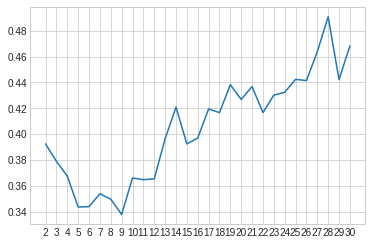

In [132]:
# Visualizing coherence measures over different K
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
plt.plot(num_of_topics, coherence) # x-axis = K, y-axis = coherece measures
plt.xticks(num_of_topics) # To label x-axis with K values
plt.show()

# K-Selection
I chose k for 4, even though coherence measure is not extraordinarilly high, because when I tried k=28 and k=14, it shows about four groups of clusters in higher level. Therefore, after trying k=4, 14, 28, 4 is the most proper number for k to derive the insights from this dataset.

**LDA Modeling**

In [148]:
lda_model = models.ldamodel.LdaModel(corpus_tfidf, id2word=dictionary, num_topics=4, random_state=777) # train LDA model

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for

In [149]:
# Coherence Measures
from gensim.models import CoherenceModel
coherence_model_lda = CoherenceModel(model=lda_model, texts=processed_documents, dictionary=dictionary, coherence='c_v') # by changing the values for the "coherence" parameter, you can use different coherence methods (e.g., 'u_mass', 'c_v', 'c_uci', 'c_npmi')
coherence_lda = coherence_model_lda.get_coherence()
print(coherence_lda)

0.3674335476840056


**LDA Model result analysis**

In [150]:
for topic in lda_model.show_topics(num_topics=15, num_words=5):# show 5 most important words for each topic
    print(topic)

print(corpus_tfidf[0])
for topic_proportion in lda_model[corpus_tfidf[0]]: # show topic distribution for the first document in the corpus
    print(topic_proportion)
for doc, topic_dist in zip(documents, lda_model[corpus_tfidf]): # print out topic distribution for each document in the corpus
    print(doc, ": ", topic_dist)
    break

(0, '0.006*"good" + 0.005*"add" + 0.005*"cheese" + 0.005*"egg" + 0.004*"butter"')
(1, '0.008*"know" + 0.007*"sound" + 0.005*"good" + 0.005*"like" + 0.004*"try"')
(2, '0.008*"recipe" + 0.005*"like" + 0.005*"flour" + 0.005*"carb" + 0.005*"try"')
(3, '0.011*"try" + 0.010*"delicious" + 0.006*"share" + 0.005*"pickle" + 0.005*"tofu"')
[(0, 0.45387100845571043), (1, 0.29638086302925104), (2, 0.13001365640568066), (3, 0.1452138377121671), (4, 0.3397651812700435), (5, 0.13177060962079423), (6, 0.25619478547982294), (7, 0.10838626809713199), (8, 0.2543925675580888), (9, 0.21916617895175086), (10, 0.24700703028003332), (11, 0.3741144579329798), (12, 0.2223064938257659), (13, 0.30795777105233757)]
(0, 0.07584874)
(1, 0.80610466)
(2, 0.05911344)
(3, 0.058933172)
 Pimento cheese spread Good ol southern American classic  Im also a fan of chicken egg or tuna salad sandwiches :  [(0, 0.07574664), (1, 0.8062048), (2, 0.059114788), (3, 0.0589338)]


In [153]:
lda_visualization = pyLDAvis.gensim_models.prepare(lda_model, corpus_tfidf, dictionary, R=30)
pyLDAvis.display(lda_visualization)
# lambda = 0.8

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


From the chart, it shows that topic 1 is usually about keto recipes. Words in topic 1 are about ingredients and tools. It can be assumed from some words in topic 1 such as cheese, salt, pepper, onion, oil for ingredients, tsp, tbsp, cup for tools

In [154]:
# Other parameters related to training 
#lda_model = models.ldamodel.LdaModel(corpus_tfidf, id2word=dictionary, num_topics=?, chunksize=?, passes=?, iterations=?)